In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.rcParams['font.family'] ='Malgun Gothic'
warnings.filterwarnings("ignore")

In [ ]:
total_data = pd.read_csv('total_data.csv', encoding='cp949')

In [ ]:
target_data = total_data[total_data['분기']>='2017 3Q']

### 시계열 결측치

In [ ]:
table = target_data.groupby(['아파트명','도로명주소'])['결측치연속'].agg(['max'])
table

,,max
아파트명,도로명주소,
21세기(동원3차),경상남도 김해시 분성로727번길 26-41,1.0
3공단부영,경상북도 칠곡군 북중리3길 70,0.0
73신암,대구시 동구 신암남로 10,5.0
BS에코파크,경상북도 청도군 한내길 50-14,8.0
BYC부천위더스빌(도시형),경기도 부천시 경인로 156,29.0
...,...,...
힐스테이트황금엘포레,대구시 수성구 청솔로 16,26.0
힐스테이트효자동,전라북도 전주시 완산구 세내로 291,7.0
힐탑,강원도 평창군 종지목길 7,12.0


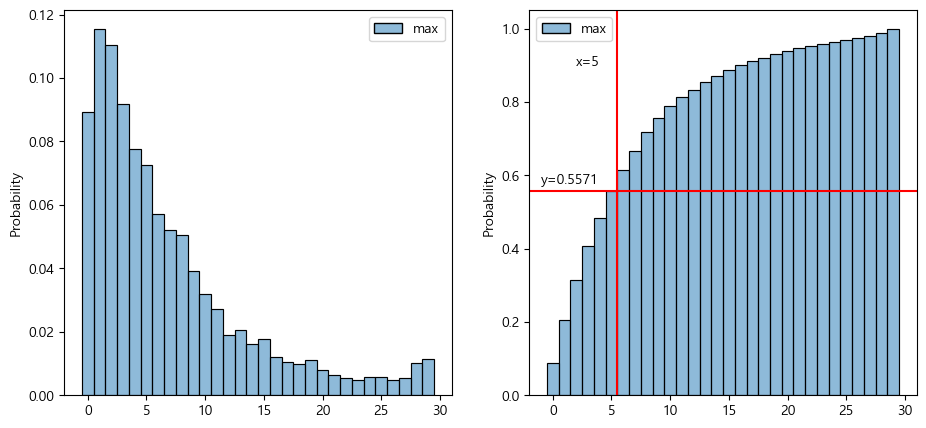

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(11,5))
sns.histplot(table, stat='probability', binwidth=1, binrange=(-0.5,29.5), ax=axes[0])
sns.histplot(table, stat='probability', binwidth=1, binrange=(-0.5,29.5), ax=axes[1], cumulative=True)

ax=axes[1]
thresh = 5
height = np.round(ax.patches[thresh].get_height(),4)

ax.axvline(thresh+.5, color='r')
ax.annotate(text=f'x={thresh}', xy=(thresh-3, 0.9));
ax.axhline(height, color='r')
ax.annotate(text=f'y={height}', xy=(-1, height+.02));

In [ ]:
tmp = target_data[target_data['결측치연속']>=9]
names = (tmp['도로명주소']+tmp['전용면적구간'].astype(str)).unique()

table = target_data[~(target_data['도로명주소']+target_data['전용면적구간'].astype(str)).isin(names)].pivot_table(index='결측치연속', columns='분기', values='도로명주소', aggfunc='count')
table = table.sort_index(ascending=False) / table.sum(axis=0)[0]

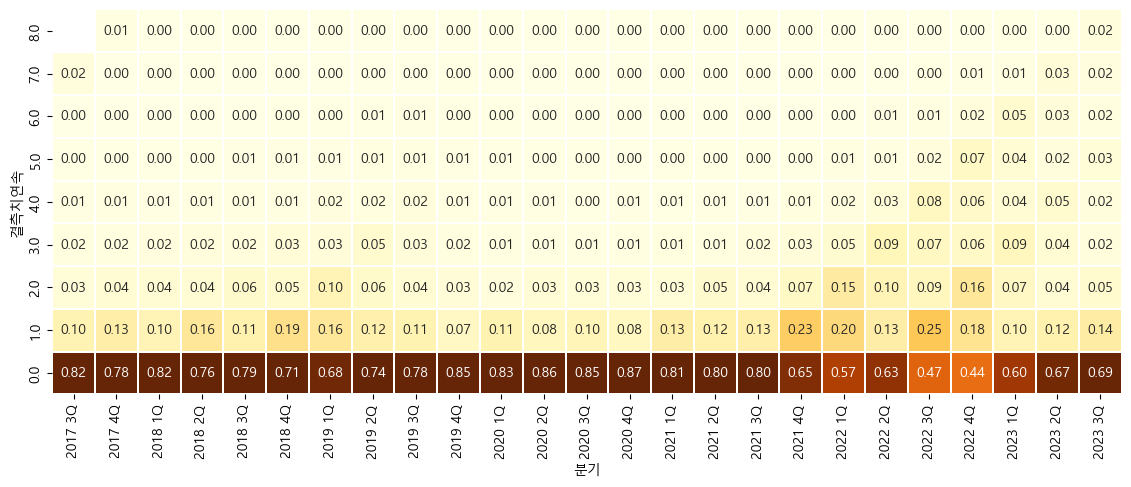

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(17,5))
sns.heatmap(table, vmin=0, vmax=.7, cmap='YlOrBr', cbar=False, square=True, linewidth=.1, annot=True, fmt='.2f', ax=ax);

In [ ]:
target_data.columns

Index(['아파트명', '법정동주소', '도로명주소', 'latitude', 'longitude', '세대수', '최고층', '용적률',
       '건폐율', '전용율', '방수', '욕실수', '현관구조', '초등학교_학군정보', '초등학교_설립정보', '건설사',
       '임대세대비율', '세대당_주차대수', '초등학교_학생수', '전용면적구간', '직접역세권_노선수', '직접역세권_노선',
       '직접역세권_역', '간접역세권_노선수', '간접역세권_노선', '간접역세권_역', '고속철_직접역세권_여부',
       '고속철_직접역세권_역명', '고속철_간접역세권_역명', '중학교명', '중학교_학업성취도', '중학교_졸업자수',
       '중학교_최단거리', '초등학교명', '초등학교_도로명주소', '초등학교_최단거리', '초등학교_최단거리구간',
       '스타벅스_매장수', '스타벅스_매장이름', '백화점쇼핑몰_유무', '백화점쇼핑몰_매장이름', '백화점쇼핑몰_최단거리',
       '마트_유무', '마트_매장이름', '마트_최단거리', '직주_근접도', '직주_이름', '직주_최단거리', '학원가_근접도',
       '최근접학원가', '학원가_최단거리', '건축년도', '분기', '전용면적합', '거래금액합', '거래량',
       '단위면적당거래금액', '평균거래금액', '거래존재여부', '결측치연속', '조정대상지구', '투기지역', '투기과열지구'],
      dtype='object')

In [ ]:
target_data['시도']=target_data['도로명주소'].apply(lambda x: x.split()[0])

In [ ]:
table = target_data.pivot_table(index='시도', columns='분기', values='거래량', aggfunc='sum')
table = table / table.sum(axis=0)

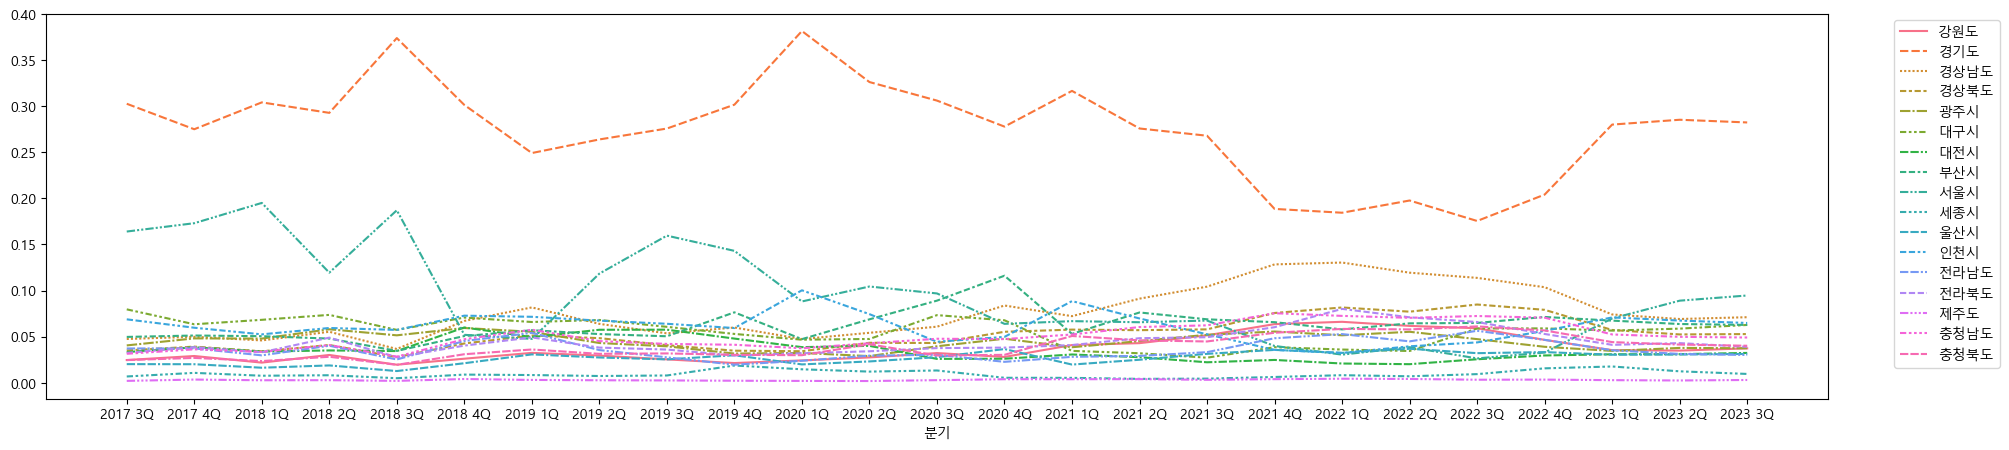

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(23,5))
sns.lineplot(table.T, ax=ax)
ax.legend(bbox_to_anchor=(1.1,1));

In [ ]:
table2 = table / np.hstack([table.values[:,0].reshape(-1,1), table.values[:,:-1]])

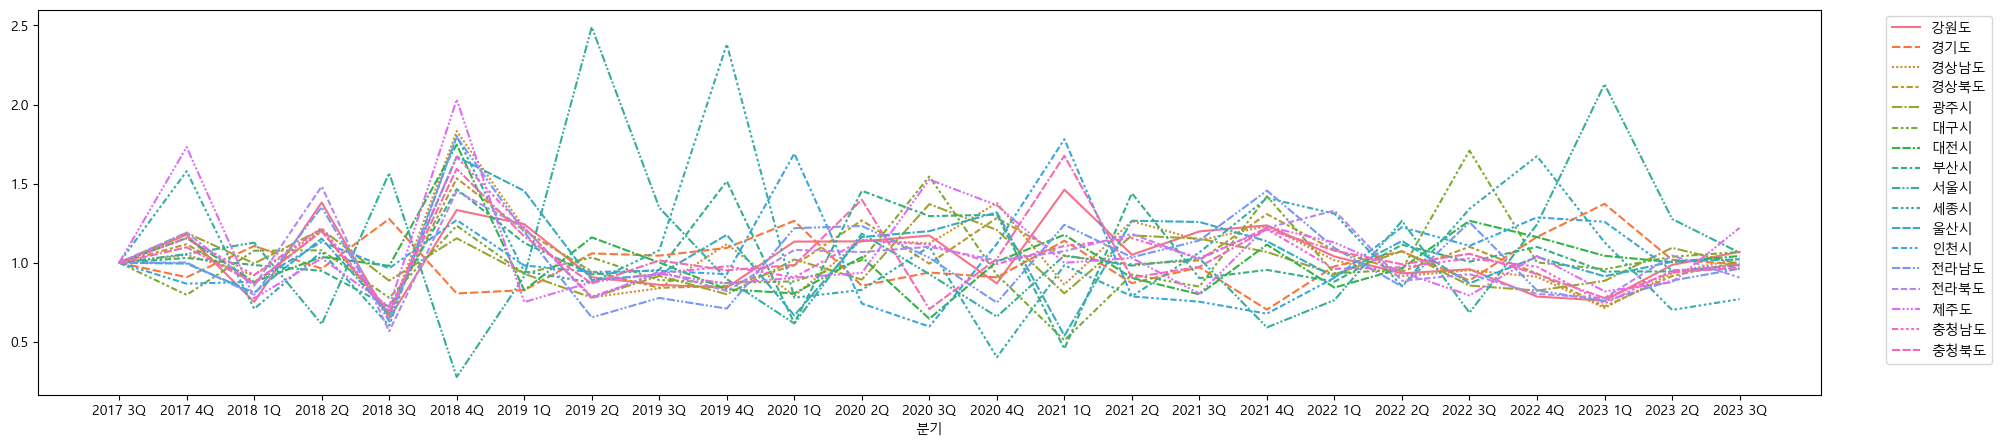

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(23,5))
sns.lineplot(table2.T, ax=ax)
ax.legend(bbox_to_anchor=(1.1,1));

In [ ]:
table3 = table / table.values[:,0].reshape(-1,1)

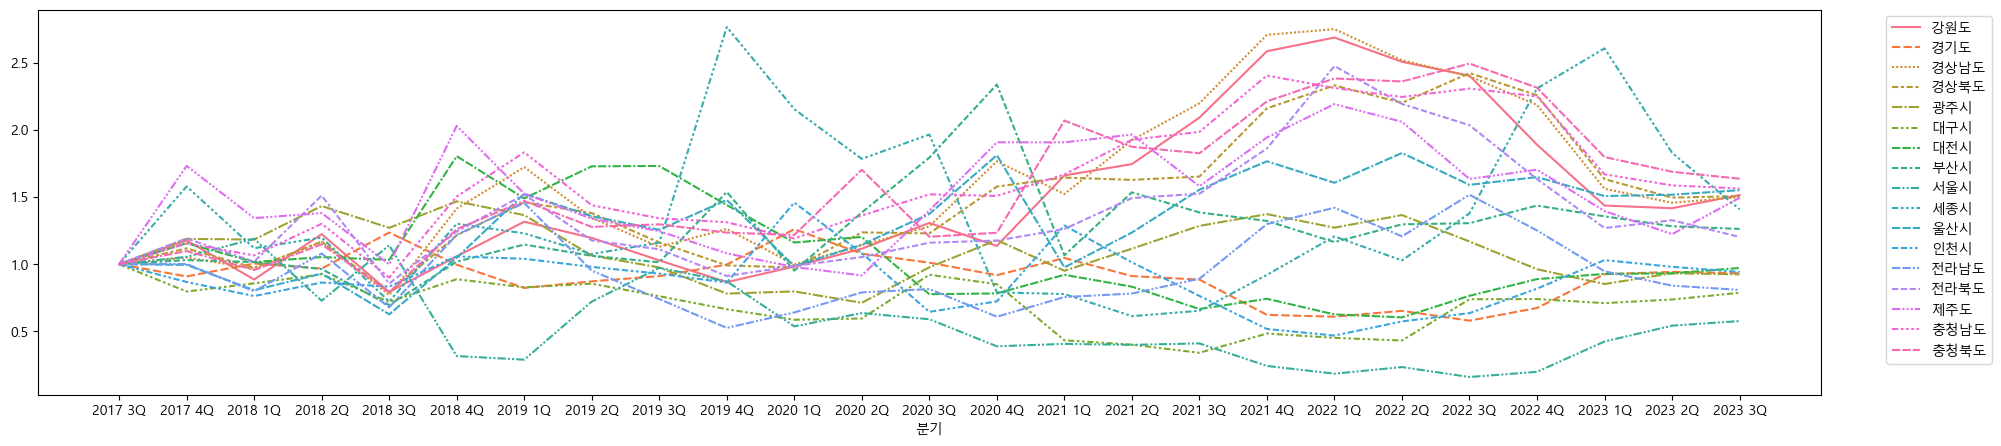

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(23,5))
sns.lineplot(table3.T, ax=ax)
ax.legend(bbox_to_anchor=(1.1,1));